In [944]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import DictVectorizer as DV

Populating the interactive namespace from numpy and matplotlib


D:\New\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'time', 'record']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [945]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_dataset_test.csv')

In [946]:
print(train_data.columns)
print(test_data.columns)

Index(['ID', 'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия', 'Вы работаете?', 'Выход на пенсию',
       'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма',
       'Туберкулез легких ', 'ВИЧ/СПИД',
       'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы',
       'Статус Курения', 'Возраст курения', 'Сигарет в день',
       'Пассивное курение', 'Частота пасс кур', 'Алкоголь', 'Возраст алког',
       'Время засыпания', 'Время пробуждения', 'Сон после обеда',
       'Спорт, клубы', 'Религия, клубы', 'ID_y', 'Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'],
      dtype='object')
Index(['ID', 'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия', 'Вы работаете?', 'Выход на пенсию',
       'Прекращение работы по болезни

In [947]:
train_data.head()

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
0,54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,06:00:00,0,0,0,54-102-358-02,0,0,0,0,0
1,54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,...,04:00:00,1,0,0,54-103-101-01,1,1,0,0,0
2,54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,...,07:00:00,0,0,0,54-501-026-03,0,0,0,0,0
3,54-501-094-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,...,07:00:00,0,0,0,54-501-094-02,1,0,0,0,0
4,54-503-022-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,...,06:00:00,0,0,0,54-503-022-01,1,0,1,1,0


In [948]:
train_data.describe()

,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,...,Пассивное курение,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,...,955.000000,788.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.523560,0.335079,0.048168,0.105759,0.120419,0.045026,0.075393,0.042932,0.020942,0.002094,...,0.234555,20.038071,0.226178,0.068063,0.023037,0.467016,0.042932,0.122513,0.100524,0.090052
std,0.499706,0.472265,0.214232,0.307690,0.325621,0.207470,0.264162,0.202810,0.143267,0.045739,...,0.423942,5.177517,0.418575,0.251986,0.150098,0.499172,0.202810,0.328049,0.300854,0.286407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [949]:
train_data.isna().sum()

ID                                         0
Пол                                        1
Семья                                      0
Этнос                                      0
Национальность                             0
Религия                                    0
Образование                                0
Профессия                                  0
Вы работаете?                              0
Выход на пенсию                            0
Прекращение работы по болезни              0
Сахарный диабет                            0
Гепатит                                    0
Онкология                                  0
Хроническое заболевание легких             0
Бронжиальная астма                         0
Туберкулез легких                          0
ВИЧ/СПИД                                   0
Регулярный прим лекарственных средств      0
Травмы за год                              0
Переломы                                   0
Статус Курения                             0
Возраст ку

In [950]:
for i in train_data.columns:
    print(i, ':')
    print(train_data[i].unique())

ID :
['54-102-358-02' '54-103-101-01' '54-501-026-03' '54-501-094-02'
 '54-503-022-01' '54-002-074-01' '54-602-027-01' '54-102-072-01'
 '54-102-145-01' '54-002-002-01' '54-002-135-01' '54-102-011-01'
 '54-701-011-01' '54-103-097-01' '54-002-081-01' '54-102-053-01'
 '54-102-028-01' '54-501-046-01' '54-501-034-01' '54-002-075-01'
 '54-001-085-01' '54-102-256-01' '54-501-011-01' '54-102-234-02'
 '54-102-097-01' '54-102-361-01' '54-102-075-01' '54-102-279-01'
 '54-701-028-01' '54-702-002-02' '54-501-071-02' '54-601-015-01'
 '54-102-069-01' '54-103-088-01' '54-102-213-01' '54-002-106-01'
 '54-501-079-01' '54-102-150-01' '54-601-011-01' '54-701-028-02'
 '54-504-033-02' '54-601-050-01' '54-001-103-01' '54-702-031-02'
 '54-102-190-01' '54-001-059-01' '54-501-081-01' '54-002-157-01'
 '54-101-046-01' '54-002-154-02' '54-503-011-01' '54-002-003-01'
 '54-002-071-01' '54-103-057-02' '54-002-043-01' '54-504-007-01'
 '54-602-023-01' '54-102-188-01' '54-102-152-01' '54-002-086-01'
 '54-602-026-02' '54

In [951]:
Col = ['Вы работаете?','Прекращение работы по болезни','Выход на пенсию', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма',
       'Туберкулез легких ', 'ВИЧ/СПИД',
       'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы',
        'Возраст курения', 'Сигарет в день',
        'Возраст алког','Пассивное курение',
        'Сон после обеда',
       'Спорт, клубы', 'Религия, клубы']
Cat = ['Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия','Статус Курения','Алкоголь',  'Частота пасс кур']
Time = ['Время пробуждения','Время засыпания']
Target = ['Артериальная гипертензия','ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца']

In [952]:
for i in range(4):
    print(Target[i], ':\n', train_data[Target[i]].value_counts())

Артериальная гипертензия :
 0    509
1    446
Name: Артериальная гипертензия, dtype: int64
ОНМК :
 0    914
1     41
Name: ОНМК, dtype: int64
Стенокардия, ИБС, инфаркт миокарда :
 0    838
1    117
Name: Стенокардия, ИБС, инфаркт миокарда, dtype: int64
Сердечная недостаточность :
 0    859
1     96
Name: Сердечная недостаточность, dtype: int64


In [953]:
for i in range(len(train_data)):
    if train_data['Статус Курения'][i] == 'Никогда не курил(а)':
        train_data['Возраст курения'][i] = 0
        train_data['Сигарет в день'][i] = 0
    if train_data['Алкоголь'][i] == 'никогда не употреблял':
        train_data['Возраст алког'][i] = 0
for i in range(len(test_data)):
    if test_data['Статус Курения'][i] == 'Никогда не курил(а)':
        test_data['Возраст курения'][i] = 0
        test_data['Сигарет в день'][i] = 0
    if test_data['Алкоголь'][i] == 'никогда не употреблял':
        test_data['Возраст алког'][i] = 0
        

C:\Users\90C5~1\AppData\Local\Temp/ipykernel_4356/2002527930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Возраст курения'][i] = 0
C:\Users\90C5~1\AppData\Local\Temp/ipykernel_4356/2002527930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Сигарет в день'][i] = 0
C:\Users\90C5~1\AppData\Local\Temp/ipykernel_4356/2002527930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Возраст алког']

In [954]:
train_data.isna().sum()

ID                                         0
Пол                                        1
Семья                                      0
Этнос                                      0
Национальность                             0
Религия                                    0
Образование                                0
Профессия                                  0
Вы работаете?                              0
Выход на пенсию                            0
Прекращение работы по болезни              0
Сахарный диабет                            0
Гепатит                                    0
Онкология                                  0
Хроническое заболевание легких             0
Бронжиальная астма                         0
Туберкулез легких                          0
ВИЧ/СПИД                                   0
Регулярный прим лекарственных средств      0
Травмы за год                              0
Переломы                                   0
Статус Курения                             0
Возраст ку

In [955]:
train_col = train_data[Col].fillna(0.0)
test_col = test_data[Col].fillna(0.0)
train_cat = train_data[Cat].fillna('NA')
test_cat = test_data[Cat].fillna('NA')

In [956]:
test_data['Время пробуждения'].unique()

array(['05:00:00', '09:00:00', '07:30:00', '06:00:00', '07:00:00',
       '06:15:00', '05:15:00', '05:30:00', '06:30:00', '08:00:00',
       '10:00:00', '00:00:00', '06:20:00', '11:00:00', '04:00:00',
       '08:30:00', '06:10:00', '07:20:00', '05:50:00', '09:30:00',
       '04:30:00', '10:30:00', '03:00:00', '06:40:00', '12:00:00',
       '03:40:00', '06:03:00', '06:50:00', '00:06:00', '06:45:00',
       '07:15:00'], dtype=object)

In [957]:
train_data['Время пробуждения'] = pd.to_datetime(train_data['Время пробуждения'],format = '%H:%M:%S')
train_data['Время засыпания'] = pd.to_datetime(train_data['Время засыпания'],format = '%H:%M:%S')
test_data['Время пробуждения'] = pd.to_datetime(test_data['Время пробуждения'],format = '%H:%M:%S')
test_data['Время засыпания'] = pd.to_datetime(test_data['Время засыпания'],format = '%H:%M:%S')

In [958]:
def time(data):
    for i in Time:
        for j in range(len(data[i])):
            data[i][j] = data[i][j].hour + data[i][j].minute/60
        

In [959]:
time(train_data)
train_time = train_data[Time]
time(test_data)
test_time = test_data[Time]

C:\Users\90C5~1\AppData\Local\Temp/ipykernel_4356/1134068037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i][j].hour + data[i][j].minute/60


In [960]:
train_target = train_data[Target]

In [961]:
train = pd.concat([train_col,train_cat, train_time,train_target], axis = 1)
test = pd.concat([test_col,test_cat,test_time], axis = 1)

(25.5, -0.5)

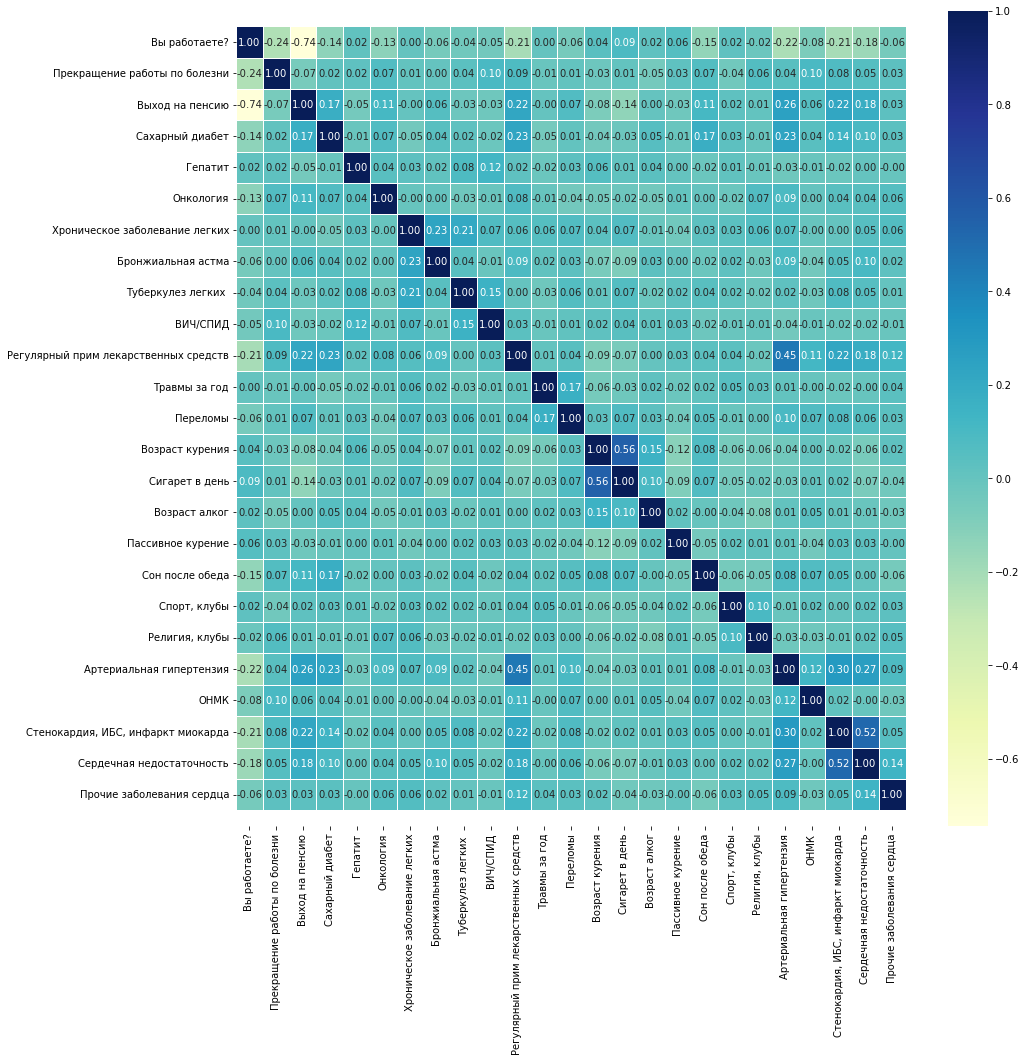

In [962]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [963]:
train = train.drop(columns = ['Прекращение работы по болезни','Гепатит','ВИЧ/СПИД','Травмы за год','Возраст курения','Сигарет в день','Возраст алког','Пассивное курение','Спорт, клубы','Религия, клубы'])
test = test.drop(columns = ['Прекращение работы по болезни','Гепатит','ВИЧ/СПИД','Травмы за год','Возраст курения','Сигарет в день','Возраст алког','Пассивное курение','Спорт, клубы','Религия, клубы'])

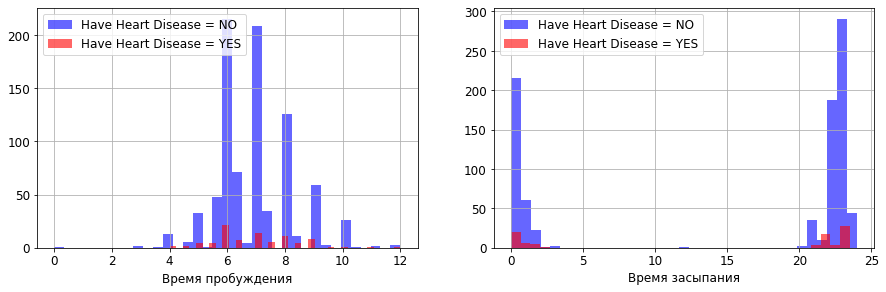

In [964]:
plt.figure(figsize=(15, 15))
matplotlib.rcParams.update({'font.size': 12})
for i, column in enumerate(Time, 1):
    plt.subplot(3, 2, i)
    train[train_zeros[Target[4]] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    train[train_zeros[Target[4]] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [965]:
cat = pd.concat([train_cat,test_cat], axis = 0, ignore_index=True)
encoder = DV(sparse = False)
cat_encoded = encoder.fit_transform(cat.T.to_dict().values())

In [966]:
train.shape

(955, 27)

In [967]:
train_cat = cat_encoded[:955]
test_cat = cat_encoded[955:]

In [968]:
nptrain_col = train_col.astype(str).to_numpy()
nptest_col = test_col.astype(str).to_numpy()
nptrain_time = train_time.astype(str).to_numpy()
nptest_time = test_time.astype(str).to_numpy()

In [969]:
nptrain = np.hstack((nptrain_col,nptrain_time,train_cat))

In [970]:
train_target = train_target.to_numpy()

In [971]:
nptest = np.hstack((nptest_col,nptest_time,test_cat))

In [972]:
model = LogisticRegression(random_state=17, class_weight = 'balanced', max_iter = 1000)
model_params = {'C': [0.1,10,100,1000],'solver':['sag','saga']}
for i in range(3,10):
    model_grid1 = GridSearchCV(model, model_params, cv=i, n_jobs=-1, scoring = 'precision')
    model_grid1.fit(nptrain,train_target[:,0])
    y_pred1 = model_grid1.predict(nptest)
    print(model_grid1.best_params_, model_grid1.best_score_)

{'C': 0.1, 'solver': 'saga'} 0.6756950850268205
{'C': 0.1, 'solver': 'sag'} 0.6789984459012699
{'C': 0.1, 'solver': 'sag'} 0.6851306652929372
{'C': 0.1, 'solver': 'saga'} 0.6857218207924136
{'C': 0.1, 'solver': 'sag'} 0.6813560214339963
{'C': 0.1, 'solver': 'saga'} 0.6831966202497507
{'C': 0.1, 'solver': 'saga'} 0.697520347613866


In [973]:
model1 =  LogisticRegression(random_state=17, class_weight = 'balanced', max_iter = 1000, C= 0.1, solver = 'saga' )
model1.fit(nptrain,train_target[:,0])
y_pred1 = model1.predict(nptest)

In [974]:
for i in range(3,10):
    model_grid2 = GridSearchCV(model, model_params, cv=i, n_jobs=-1, scoring = 'precision')
    model_grid2.fit(nptrain,train_target[:,1])
    y_pred2 = model_grid2.predict(nptest)
    y_pred22 = model_grid2.predict(nptrain)
    print(model_grid2.best_params_, model_grid2.best_score_)



D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 1000, 'solver': 'sag'} 0.09481220350785569


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 10, 'solver': 'sag'} 0.08420757293708114
{'C': 0.1, 'solver': 'saga'} 0.08004036320074057


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 0.1, 'solver': 'sag'} 0.07278721679912041
{'C': 0.1, 'solver': 'saga'} 0.0668664025806883
{'C': 0.1, 'solver': 'saga'} 0.07443502801465499
{'C': 10, 'solver': 'saga'} 0.07010845547244014


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [975]:
model2 =  LogisticRegression(random_state=17, class_weight = 'balanced', max_iter = 1000,C= 0.1,solver = 'saga' )
model2.fit(nptrain,train_target[:,1])
y_pred2 = model2.predict(nptest)

In [976]:
for i in range(3,11):
    model_grid3 = GridSearchCV(model, model_params, cv=i, n_jobs=-1, scoring = 'precision')
    model_grid3.fit(nptrain,train_target[:,2])
    y_pred3 = model_grid3.predict(nptest)
    y_pred33 = model_grid3.predict(nptrain)
    print(model_grid3.best_params_, model_grid3.best_score_)


{'C': 0.1, 'solver': 'saga'} 0.22148951489289112
{'C': 0.1, 'solver': 'saga'} 0.23041213544839775
{'C': 0.1, 'solver': 'saga'} 0.24288810713604986
{'C': 0.1, 'solver': 'sag'} 0.2292087690190383


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 10, 'solver': 'sag'} 0.24170340747278635
{'C': 0.1, 'solver': 'sag'} 0.23117426962855173
{'C': 0.1, 'solver': 'sag'} 0.2331766124485321
{'C': 0.1, 'solver': 'sag'} 0.23673175398217108


In [977]:
model3 =  LogisticRegression(random_state=17, class_weight = 'balanced', max_iter = 1000, C= 0.1, solver = 'sag' )
model3.fit(nptrain,train_target[:,2])
y_pred3 = model3.predict(nptest)

In [978]:
for i in range(3,10):
    model_grid4 = GridSearchCV(model, model_params, cv=i, n_jobs=-1, scoring = 'precision')
    model_grid4.fit(nptrain,train_target[:,3])
    y_pred4 = model_grid4.predict(nptest)
    y_pred44 = model_grid4.predict(nptrain)
    print(model_grid4.best_params_, model_grid4.best_score_)

{'C': 0.1, 'solver': 'sag'} 0.19074511824761242
{'C': 0.1, 'solver': 'saga'} 0.20133222835204542
{'C': 0.1, 'solver': 'saga'} 0.2067104291111721
{'C': 0.1, 'solver': 'sag'} 0.20747894434439806
{'C': 0.1, 'solver': 'sag'} 0.21281204719882515
{'C': 0.1, 'solver': 'sag'} 0.22342524365106825
{'C': 0.1, 'solver': 'sag'} 0.21708509224402348


In [979]:
model4 =  LogisticRegression(random_state=17, class_weight = 'balanced', max_iter = 1000,C= 0.1, solver = 'sag' )
model4.fit(nptrain,train_target[:,3])
y_pred4 = model4.predict(nptest)

In [980]:
for i in range(3,13):
    model_grid5 = GridSearchCV(model, model_params, cv=i, n_jobs=-1, scoring = 'precision')
    model_grid5.fit(nptrain,train_target[:,4])
    y_pred5 = model_grid5.predict(nptest)
    print(model_grid5.best_params_, model_grid5.best_score_)
   

D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 1000, 'solver': 'sag'} 0.10350257126986688
{'C': 0.1, 'solver': 'saga'} 0.11612493486190723


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 10, 'solver': 'saga'} 0.10926406926406926
{'C': 0.1, 'solver': 'sag'} 0.10707018433916066
{'C': 0.1, 'solver': 'sag'} 0.11588810051132854


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 1000, 'solver': 'sag'} 0.11714058727636656
{'C': 0.1, 'solver': 'sag'} 0.10896781050788967


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 10, 'solver': 'saga'} 0.11115243849366721


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 10, 'solver': 'sag'} 0.11825873182864127
{'C': 10, 'solver': 'saga'} 0.11109312545607786


D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [981]:
model5 =  LogisticRegression(random_state=17, class_weight = 'balanced', max_iter = 1000, C= 10 , solver = 'saga' )
model5.fit(nptrain,train_target[:,4])
y_pred5 = model5.predict(nptest)

D:\New\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [983]:
y_pred = np.vstack((y_pred1,y_pred2,y_pred3,y_pred4,y_pred5))
y_pred = y_pred.T
np.savetxt('y_pred.csv',y_pred,delimiter=',', fmt = '%3.0d')